<center><img src = "https://github.com/Trading-com-Dados/pmf/blob/main/logotipo-trading-com-dados.svg?raw=true" width = "200">

<center><img src = "https://github.com/Trading-com-Dados/pmf/blob/main/PMF%20002.png?raw=true" width = "700">

---
# **Cálculo para o Mercado Financeiro**
---

## **1. Bibliotecas**

<a id="importar">**Todas as Bibliotecas usadas neste módulo estão abaixo**</a>

### **1.1. Instação das Bibliotecas**

In [ ]:
!pip install yfinance
!pip install pandas
!pip install numpy
!pip install matplotlib

### **1.2. Importação das Bibliotecas**

In [58]:
import yfinance as yf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

## **2. Retorno** 

- O retorno esperado de uma carteira é obtido pelo peso de cada ativo na carteira multiplicado pelo seu retorno esperado.

$$R_p=\displaystyle\sum_{i=1}^nw_i*r_i$$

onde,

- $n$ é a quantidade de ativos
- $w_i$ é o peso do ativo $i$ na carteira
- $r_i$ é o retorno do ativo $i$

### **2.1. Retorno de um Ativo**  

[Clique aqui para acessar a seção de importação e instalação de bibliotecas](#importar)

In [29]:
pesos = pd.Series([0.1, 0.2, 0.3, 0.4])

In [30]:
nome_ativos_sa = (pd.Series(['ITSA4', 'ABEV3', 'WEGE3', 'EGIE3'])+'.SA').tolist()

In [31]:
data_inicial = '2022-01-01'
data_final = '2022-01-31'

In [32]:
# Agora a função download do yf precisa especificar para trazer a coluna Adj Close e apenas um index
# Código antigo:
#fechamentos = yf.download(tickers=nome_ativos_sa, start=data_inicial, end = data_final, rounding=True)['Adj Close']

# Atualizado:
fechamentos = yf.download(
    tickers=nome_ativos_sa, 
    start=data_inicial, 
    end = data_final, 
    rounding=True,
    auto_adjust=False,
    multi_level_index=False)['Adj Close']
fechamentos.columns = fechamentos.columns.str.rstrip('.SA')  
retornos = fechamentos.pct_change()

[                       0%                       ]

[*********************100%***********************]  4 of 4 completed


In [33]:
retornos.mean()

Ticker
ABEV3   -0.001259
EGIE3    0.002867
ITSA4    0.006539
WEGE3   -0.000262
dtype: float64

In [34]:
retorno_carteira = sum(pesos*retornos.mean().values)

In [35]:
retorno_carteira

0.00230432768685385

### **2.2. Retorno de uma Carteira**

[Clique aqui para acessar a seção de importação e instalação de bibliotecas](#importar)

In [36]:
nome_ativos = ['ITSA4', 'ABEV3', 'WEGE3', 'EGIE3', 'VIIA3', 'OIBR3', 'PETR4','GGBR3', 'VILG11', 'CMIN3', 'MGLU3', 'VIVT3']

In [37]:
nome_ativos_sa = (pd.Series(nome_ativos)+'.SA').tolist()

In [38]:
# Agora a função download do yf precisa especificar para trazer a coluna Adj Close e apenas um index
# Código antigo:
#fechamentos = yf.download(tickers=nome_ativos_sa, start=data_inicial, rounding=True)['Adj Close']

# Atualizado:
fechamentos = yf.download(
    tickers=nome_ativos_sa, 
    start=data_inicial, 
    rounding=True,
    auto_adjust=False,
    multi_level_index=False)['Adj Close']

[                       0%                       ]

[*********************100%***********************]  12 of 12 completed

1 Failed download:
['VIIA3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


In [39]:
fechamentos

Ticker,ABEV3.SA,CMIN3.SA,EGIE3.SA,GGBR3.SA,ITSA4.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VIIA3.SA,VILG11.SA,VIVT3.SA,WEGE3.SA
Date,,,,,,,,,,,,
2022-01-03,13.57,4.39,31.04,13.58,6.04,62.85,75.00,11.46,NaN,77.23,40.29,30.41
2022-01-04,13.56,4.70,31.13,13.63,6.08,61.82,72.00,11.50,NaN,78.12,40.29,30.26
2022-01-05,13.29,4.33,30.69,13.46,6.02,60.05,71.00,11.05,NaN,74.83,40.24,28.66
2022-01-06,13.08,4.25,30.44,13.58,6.07,58.46,71.00,11.05,NaN,76.73,39.59,28.65
2022-01-07,12.87,4.35,30.48,13.65,6.14,58.18,71.00,11.10,NaN,77.82,39.32,27.93
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-22,11.02,5.19,35.33,16.08,9.19,6.37,1.49,37.09,NaN,70.67,50.60,56.44
2025-01-23,11.05,5.22,35.15,16.14,9.17,6.29,1.52,36.83,NaN,70.50,50.85,57.25
2025-01-24,10.87,5.15,35.17,16.25,9.15,6.37,1.55,36.64,NaN,70.88,50.56,57.87


#### **2.2.1. Tirando o .SA**

[Clique aqui para acessar a seção de importação e instalação de bibliotecas](#importar)

In [40]:
fechamentos.columns = fechamentos.columns.str.rstrip('.SA')  

In [41]:
fechamentos

Ticker,ABEV3,CMIN3,EGIE3,GGBR3,ITSA4,MGLU3,OIBR3,PETR4,VIIA3,VILG11,VIVT3,WEGE3
Date,,,,,,,,,,,,
2022-01-03,13.57,4.39,31.04,13.58,6.04,62.85,75.00,11.46,NaN,77.23,40.29,30.41
2022-01-04,13.56,4.70,31.13,13.63,6.08,61.82,72.00,11.50,NaN,78.12,40.29,30.26
2022-01-05,13.29,4.33,30.69,13.46,6.02,60.05,71.00,11.05,NaN,74.83,40.24,28.66
2022-01-06,13.08,4.25,30.44,13.58,6.07,58.46,71.00,11.05,NaN,76.73,39.59,28.65
2022-01-07,12.87,4.35,30.48,13.65,6.14,58.18,71.00,11.10,NaN,77.82,39.32,27.93
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-22,11.02,5.19,35.33,16.08,9.19,6.37,1.49,37.09,NaN,70.67,50.60,56.44
2025-01-23,11.05,5.22,35.15,16.14,9.17,6.29,1.52,36.83,NaN,70.50,50.85,57.25
2025-01-24,10.87,5.15,35.17,16.25,9.15,6.37,1.55,36.64,NaN,70.88,50.56,57.87


In [42]:
# Código antigo:
# retornos = fechamentos.pct_change()

# Atualização:
# Futuramente deve explicitar o método que os dados serão preenchidos antes de usar o pct_change.
# Por default o pct_change usa o fill_method='pad', mas não terá mais esse argumento na função pct_change.
fechamentos = fechamentos.ffill()
retornos = fechamentos.pct_change()

C:\Users\bague\AppData\Local\Temp\ipykernel_20852\4138063175.py:8: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  retornos = fechamentos.pct_change()


In [43]:
retornos

Ticker,ABEV3,CMIN3,EGIE3,GGBR3,ITSA4,MGLU3,OIBR3,PETR4,VIIA3,VILG11,VIVT3,WEGE3
Date,,,,,,,,,,,,
2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,-0.000737,0.070615,0.002899,0.003682,0.006623,-0.016388,-0.040000,0.003490,NaN,0.011524,0.000000,-0.004933
2022-01-05,-0.019912,-0.078723,-0.014134,-0.012472,-0.009868,-0.028632,-0.013889,-0.039130,NaN,-0.042115,-0.001241,-0.052875
2022-01-06,-0.015801,-0.018476,-0.008146,0.008915,0.008306,-0.026478,0.000000,0.000000,NaN,0.025391,-0.016153,-0.000349
2022-01-07,-0.016055,0.023529,0.001314,0.005155,0.011532,-0.004790,0.000000,0.004525,NaN,0.014206,-0.006820,-0.025131
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-22,-0.020444,-0.013308,-0.003947,-0.041716,-0.001087,0.034091,0.006757,-0.005630,NaN,-0.006188,0.015656,0.014560
2025-01-23,0.002722,0.005780,-0.005095,0.003731,-0.002176,-0.012559,0.020134,-0.007010,NaN,-0.002406,0.004941,0.014352
2025-01-24,-0.016290,-0.013410,0.000569,0.006815,-0.002181,0.012719,0.019737,-0.005159,NaN,0.005390,-0.005703,0.010830


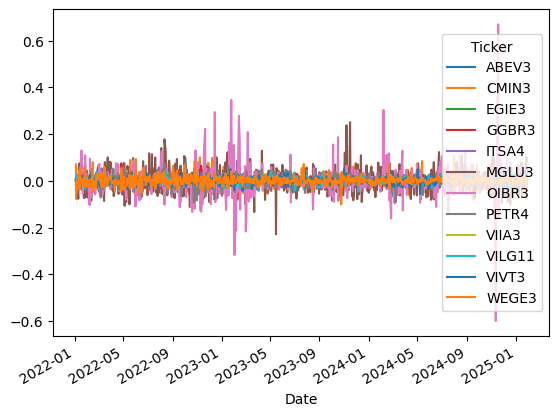

In [44]:
retornos.plot();

## **3. Variância**

- A variância do retorno de um ativo $i$ quando todos os retornos possuem a mesma probabilidade, é dada por:

$$\sigma_i^2=\displaystyle\sum_{j=1}^T\dfrac{(r_{ij}-\overline{r}_i)^2}{T}$$

onde,

- $T$ é a quantidade de períodos de tempo
- $r_{ij}$ é o retorno do ativo $i$ no período $j$
- $\overline{r}_i$ é a média do retorno do ativo $i$ no período considerado

### **3.1. Variância de um Ativo**

[Clique aqui para acessar a seção de importação e instalação de bibliotecas](#importar)

In [23]:
nome_ativos_sa = (pd.Series(['ITSA4', 'ABEV3', 'WEGE3', 'EGIE3'])+'.SA').tolist()

In [24]:
data_inicial = '2022-01-01'
data_final = '2022-01-31'

In [25]:
fechamentos = yf.download(
    tickers=nome_ativos_sa, 
    start=data_inicial, 
    end = data_final, 
    rounding=True,
    auto_adjust=False,
    multi_level_index=False)['Adj Close']
fechamentos.columns = fechamentos.columns.str.rstrip('.SA')  
retornos = fechamentos.pct_change()

[*********************100%***********************]  4 of 4 completed


In [26]:
retornos.var()

Ticker
ABEV3    0.000243
EGIE3    0.000051
ITSA4    0.000104
WEGE3    0.000848
dtype: float64

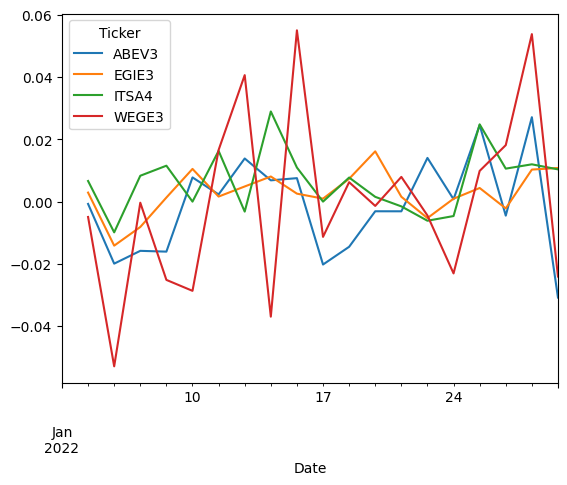

In [27]:
retornos.plot();

### **3.2. Variância de uma Carteira**

- A variância de uma carteira é dada por:

$$\sigma_p^2=\displaystyle\sum_{i=1}^n\displaystyle\sum_{j=1}^nw_iw_j\sigma_{ij}=w^T\cdot Cov\cdot w$$

onde,

- $w_i$ é o peso do ativo $i$ na carteira
- $\sigma_{ij}$ é a covariância entre os ativos $i$ e $j$
- $w$ é o vetor de pesos
- $Cov$ é a matriz de covariância dos retornos dos ativos

[Clique aqui para acessar a seção de importação e instalação de bibliotecas](#importar)

In [46]:
nome_ativos_sa = (pd.Series(['ITSA4', 'ABEV3', 'WEGE3', 'EGIE3'])+'.SA').tolist()

In [47]:
data_inicial = '2022-01-01'
data_final = '2022-01-31'

In [48]:
fechamentos = yf.download(
    tickers=nome_ativos_sa, 
    start=data_inicial, end = 
    data_final, 
    rounding=True,
    auto_adjust=False,
    multi_level_index=False)['Adj Close']
fechamentos.columns = fechamentos.columns.str.rstrip('.SA')  
retornos = fechamentos.pct_change()

[*********************100%***********************]  4 of 4 completed


In [49]:
retornos.cov()

Ticker,ABEV3,EGIE3,ITSA4,WEGE3
Ticker,,,,
ABEV3,0.000243,0.000027,0.000037,0.000244
EGIE3,0.000027,0.000051,0.000025,0.000045
ITSA4,0.000037,0.000025,0.000104,0.000050
WEGE3,0.000244,0.000045,0.000050,0.000848


In [50]:
pesos = np.array([0.1,0.2,0.3,0.4])

In [51]:
variancia = pesos.dot(retornos.cov().dot(pesos))

In [52]:
variancia

0.00019452369964234362

In [53]:
retornos.var()

Ticker
ABEV3    0.000243
EGIE3    0.000051
ITSA4    0.000104
WEGE3    0.000848
dtype: float64

### **3.3. Comparando a Variância para Diferentes Cardinalidades**

[Clique aqui para acessar a seção de importação e instalação de bibliotecas](#importar)

In [147]:
# Usando boas práticas para acessar os arquivos na pasta 'Meus Arquivos'
# caminho atual do projeto
base_path = os.getcwd()
# Caminho completo do arquivo
file_path = os.path.join(base_path, 'Meus Arquivos', 'ibov.xlsx')

dados = pd.read_excel(file_path)

In [148]:
ativos = dados['Código'].values

In [149]:
n = ativos.size

In [150]:
data_inicial = '2021-01-01'
data_final = '2022-01-31'

In [151]:
fechamentos = yf.download(
    tickers=(ativos+'.SA').tolist(), 
    start=data_inicial, 
    end = data_final, 
    rounding=True,
    auto_adjust=False,
    multi_level_index=False)['Adj Close']
fechamentos.columns = fechamentos.columns.str.rstrip('.SA')  

# O trecho abaixo foi modificado pois alguns ativos não foram encontrados no yfinance (ou por não existir mais ou outro motivo).
# Assim o dataframe fechamentos trazia colunas inteiras como NaN e isso causa erro na função calcula_cov.
# Excluindo ativos que possuem valor NaN em toda sua coluna
fechamentos = fechamentos.dropna(axis=1, how='all')
fechamentos = fechamentos.ffill()  # preenchndo linhas
retornos = fechamentos.pct_change()

# Agora como o dataframe pode conter menos ativos temos que atualizar os valores de 'ativos' e 'n'
n = len(fechamentos.columns)
ativos = np.array(fechamentos.columns)


[*********************100%***********************]  92 of 92 completed

8 Failed downloads:
['BRML3.SA', 'CIEL3.SA', 'ARZZ3.SA', 'ENBR3.SA', 'SOMA3.SA', 'RRRP3.SA', 'VIIA3.SA', 'SULA11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


In [152]:
def calcula_cov(ativos,retornos,n):
    variancia = []
    for i in range(2,n,2):
        aux = np.random.rand(i,1)[:,0]
        pesos = aux/sum(aux)
        variancia.append(pesos.dot(retornos[ativos[:i]].cov().dot(pesos)).round(5))
    return variancia   

In [153]:
variancias = calcula_cov(ativos,retornos,n)

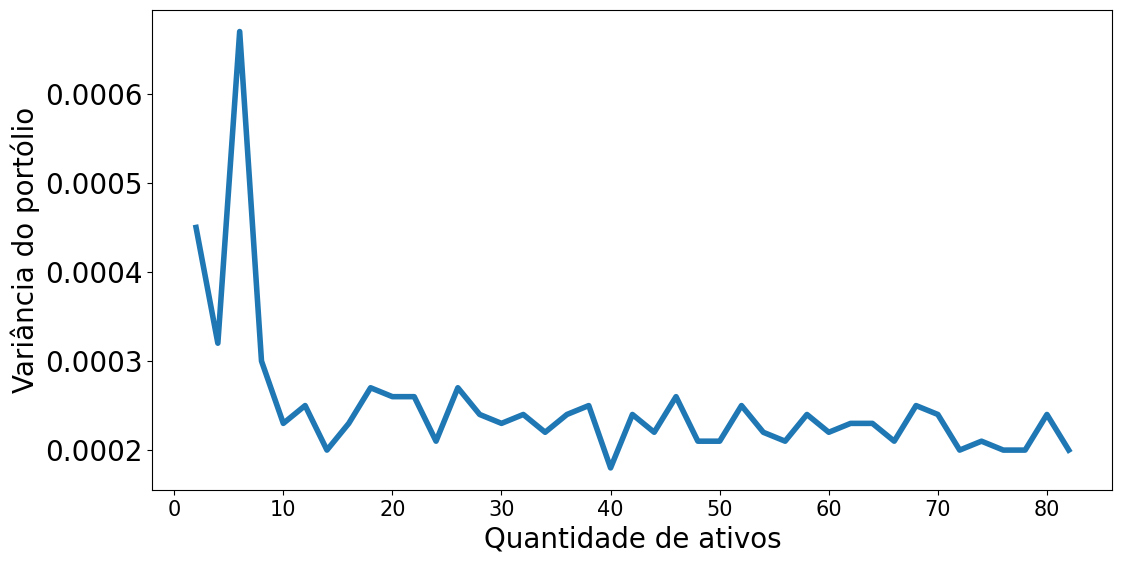

In [154]:
fig = plt.figure(figsize = (12,6))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(range(2,n,2),variancias, linewidth = 4,label="Renda Variável")
ax1.set_xlabel('Quantidade de ativos', fontsize=20)
ax1.set_ylabel("Variância do portólio", fontsize=20)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=20)
plt.show();

## <left>**4. Nenhuma Relação entre os Retornos dos Ativos ($\rho=0$)**</left>

### **Risco da Carteira**

$$\sigma_p=(45X_C^2-18X_C+9)^{\frac{1}{2}}$$

### **Retorno da Carteira**

<center>
    <img src="image.png">
</center>
    

$$\overline{R}_p=X_C\overline{R}_C+(1-X_C)\overline{R}_E$$

[Clique aqui para acessar a seção de importação e instalação de bibliotecas](#importar)

In [159]:
def calcula_desvio(xc):
    return np.sqrt(45*xc**2-18*xc+9)

In [160]:
def calcula_retorno(xc):
    return xc*14+(1-xc)*8

In [161]:
xc = np.arange(0, 1.1, 0.1)

In [162]:
xc

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [163]:
desvio = list(map(lambda x: calcula_desvio(x).round(2), xc))
retorno = list(map(lambda x: calcula_retorno(x).round(2), xc))

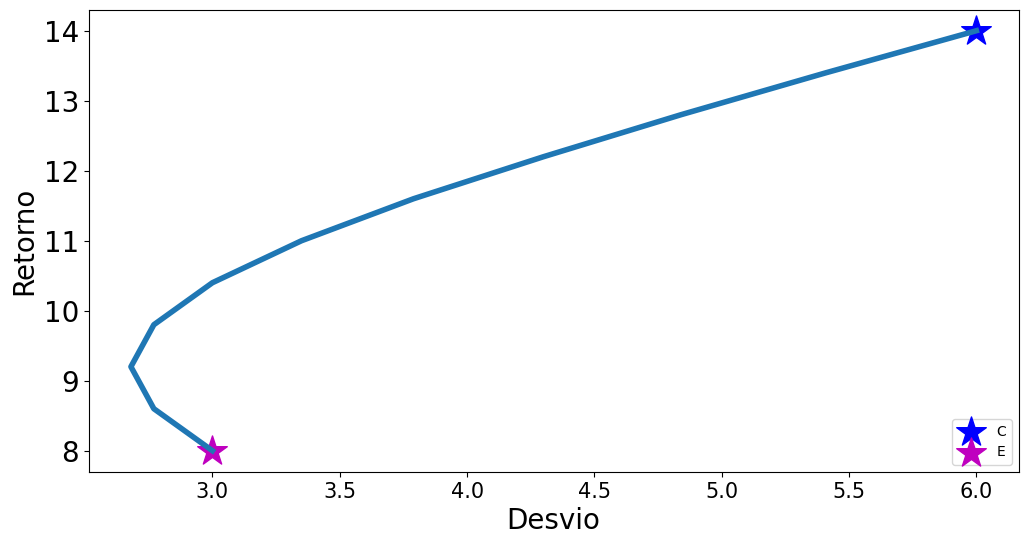

In [165]:
plt.figure(figsize = (12,6))
plt.plot(desvio,retorno, linewidth = 4)
plt.scatter(6,14,marker='*',s=500,c="b",label='C')
plt.scatter(3,8,marker='*',s=500,c="m",label='E')
plt.xlabel('Desvio', fontsize=20)
plt.ylabel("Retorno", fontsize=20)
plt.legend(loc='lower right')
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=20)
plt.show();

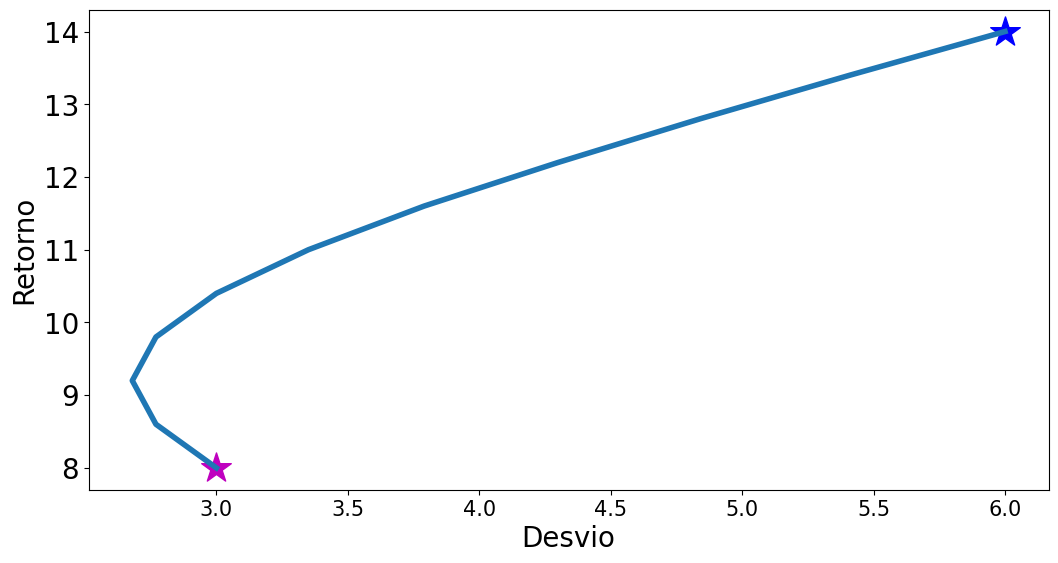

In [166]:
fig = plt.figure(figsize = (12,6))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(desvio,retorno, linewidth = 4)
plt.scatter(6,14,marker='*',s=500,c="b",label='C')
plt.scatter(3,8,marker='*',s=500,c="m",label='E')
ax1.set_xlabel('Desvio', fontsize=20)
ax1.set_ylabel("Retorno", fontsize=20)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=20)
plt.show();

## **5. Caso 4: Risco Intermediário ($\rho=0.5$)**

**Subsituindo $\rho_{CE}=0.5$ na fórmula** 
    
$$\sigma_p=(X_ C^2\sigma_C^2+(1-X_C)^2\sigma_E^2+2X_C(1-X_C)\rho_{CE}\sigma_C\sigma_E)^{\frac{1}{2}}$$
    
**Obtemos**    
    
$$\sigma_p=(X_ C^2\sigma_C^2+(1-X_C)^2\sigma_E^2+2X_C(1-X_C)\frac{1}{2}\sigma_C\sigma_E)^{\frac{1}{2}}$$ 
    
**No nosso exemplo,**

<center>    
    <img src="image.png">
</center>
    
$$\sigma_p=(X_ C^26^2+(1-X_C)^23^2+2X_C(1-X_C)\frac{1}{2}6\times3)^{\frac{1}{2}}$$     
    
**Resumindo...**
    
$$\sigma_p=(27X_C^2+9)^{\frac{1}{2}}$$    

[Clique aqui para acessar a seção de importação e instalação de bibliotecas](#importar)

In [167]:
def calcula_desvio_intermediario(xc):
    return (27*xc**2+9)**(0.5)

In [168]:
desvio_intermediario = list(map(lambda x: calcula_desvio_intermediario(x).round(2), xc))

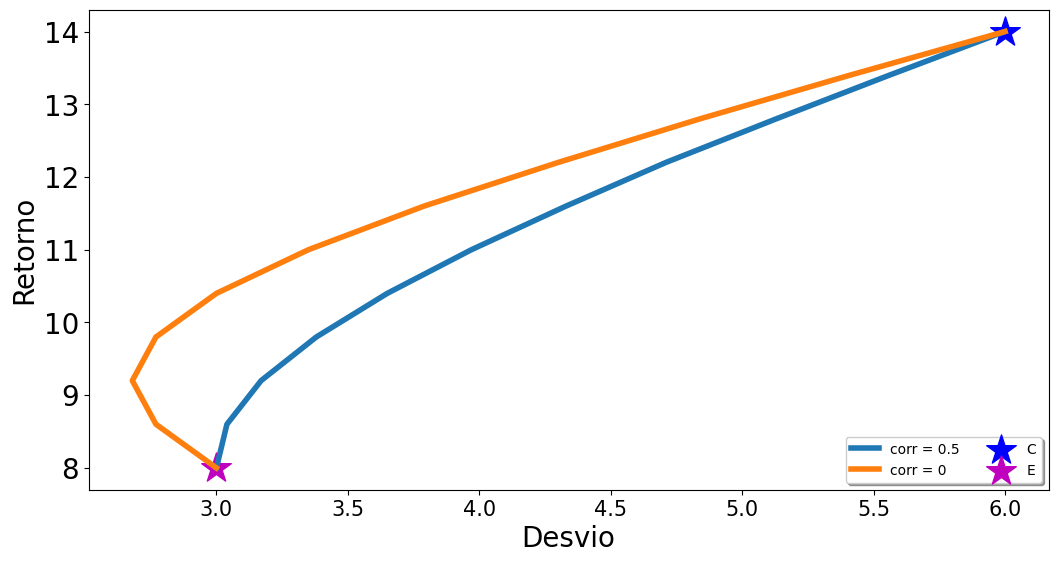

In [172]:
fig = plt.figure(figsize = (12,6))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(desvio_intermediario,retorno, linewidth = 4, label = 'corr = 0.5')
ax1.plot(desvio,retorno, linewidth = 4, label = 'corr = 0')
plt.scatter(6,14,marker='*',s=500,c="b",label='C')
plt.scatter(3,8,marker='*',s=500,c="m",label='E')
ax1.set_xlabel('Desvio', fontsize=20)
ax1.set_ylabel("Retorno", fontsize=20)
legend = plt.legend(loc='lower right', shadow=True, fontsize=10, ncol = 2)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=20)
plt.show();

## **6. Permitido Vendas a Descoberto**

**Voltando ao caso em que o coeficiente de correlação era $\rho=0.5$**
    
$$\sigma_p=(27X_C^2+9)$$
    
$$\overline{R}_p=14X_C+(1-X_C)8$$

In [173]:
xc = np.arange(-1, 2.1, 0.1).round(2)

In [174]:
xc

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ])

**Risco a Descoberto**

In [175]:
desvio_descoberto = list(map(lambda x: calcula_desvio_intermediario(x).round(2), xc))

**Retorno a Descoberto**

In [177]:
retorno_descoberto = list(map(lambda x: calcula_retorno(x).round(2), xc))

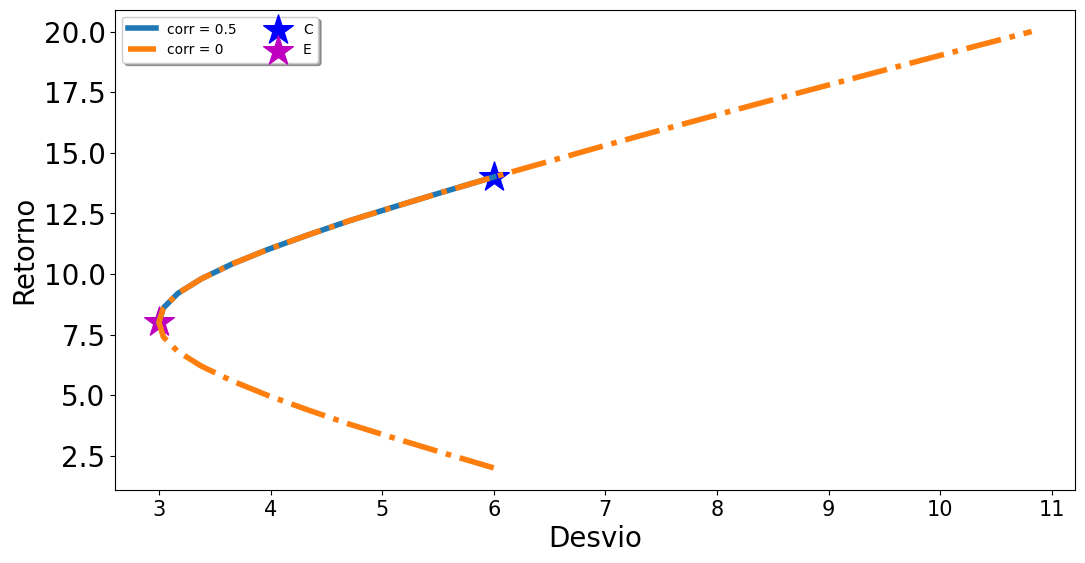

In [176]:
fig = plt.figure(figsize = (12,6))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(desvio_intermediario,retorno, linewidth = 4, label = 'corr = 0.5')
ax1.plot(desvio_descoberto,retorno_descoberto, linewidth = 4, label = 'corr = 0',linestyle = '-.')
plt.scatter(6,14,marker='*',s=500,c="b",label='C')
plt.scatter(3,8,marker='*',s=500,c="m",label='E')
ax1.set_xlabel('Desvio', fontsize=20)
ax1.set_ylabel("Retorno", fontsize=20)
legend = plt.legend(loc='upper left', shadow=True, fontsize=10, ncol = 2)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=20)
plt.show();